In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/with_genres.csv")
df = df.drop(["Unnamed: 0.1","Unnamed: 0"], axis="columns")
df.head(100)

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,popularity,uri,title,artist,year,target,genre
0,0.425,0.1000,135.128,0.3750,0.328000,0.130000,4,0.701,7,194088,-10.965,0.5620,1,audio_features,89,spotify:track:2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,2019,1,22
1,0.125,0.2650,111.554,0.2390,0.751000,0.002070,4,0.521,9,243725,-17.832,0.0528,1,audio_features,78,spotify:track:4QIo4oxwzzafcBWkKjDpXY,xanny,Billie Eilish,2019,1,22
2,0.533,0.1390,150.455,0.1860,0.462000,0.219000,4,0.678,4,180953,-10.485,0.3230,1,audio_features,81,spotify:track:3XF5xLJHOQQRbWya6hBp7d,you should see me in a crown,Billie Eilish,2019,1,22
3,0.444,0.1770,185.044,0.3720,0.283000,0.143000,4,0.726,8,168840,-8.922,0.5690,0,audio_features,80,spotify:track:6IRdLKIyS4p7XNiP8r6rsx,all the good girls go to hell,Billie Eilish,2019,1,22
4,0.351,0.7520,118.028,0.2410,0.390000,0.000009,4,0.853,7,221543,-10.198,0.2820,1,audio_features,81,spotify:track:3Fj47GNK2kUF0uaEDgXLaD,wish you were gay,Billie Eilish,2019,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.836,0.0550,132.937,0.0438,0.000143,0.000507,4,0.484,1,494773,-4.658,0.4030,1,audio_features,41,spotify:track:5jE2hljNVTJZeodUXQu9Ea,Fixxxer,Metallica,1997,1,26
96,0.903,0.0979,157.825,0.0314,0.000022,0.052200,4,0.426,10,304400,-4.535,0.4420,0,audio_features,48,spotify:track:3QWzxUE2WA5WoSi82KCODk,Ain't My Bitch,Metallica,1996,1,26
97,0.907,0.5490,115.217,0.0345,0.000005,0.008570,4,0.512,1,328200,-4.432,0.6730,0,audio_features,45,spotify:track:0SwHR5lvAfgI8Z2D6YgvMd,2 X 4,Metallica,1996,1,26
98,0.859,0.1550,94.437,0.0307,0.000018,0.003410,4,0.478,4,398867,-5.347,0.2860,1,audio_features,45,spotify:track:2UmXstEJ8nkpUUfQRYieC6,The House That Jack Built,Metallica,1996,1,26


In [ ]:
cols = ['genre']  + [col for col in df if col != 'genre']
df = df[cols]
df.head()

,genre,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,popularity,uri,title,artist,year,target
0,22,0.425,0.100,135.128,0.375,0.328,0.130000,4,0.701,7,194088,-10.965,0.5620,1,audio_features,89,spotify:track:2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,2019,1
1,22,0.125,0.265,111.554,0.239,0.751,0.002070,4,0.521,9,243725,-17.832,0.0528,1,audio_features,78,spotify:track:4QIo4oxwzzafcBWkKjDpXY,xanny,Billie Eilish,2019,1
2,22,0.533,0.139,150.455,0.186,0.462,0.219000,4,0.678,4,180953,-10.485,0.3230,1,audio_features,81,spotify:track:3XF5xLJHOQQRbWya6hBp7d,you should see me in a crown,Billie Eilish,2019,1
3,22,0.444,0.177,185.044,0.372,0.283,0.143000,4,0.726,8,168840,-8.922,0.5690,0,audio_features,80,spotify:track:6IRdLKIyS4p7XNiP8r6rsx,all the good girls go to hell,Billie Eilish,2019,1
4,22,0.351,0.752,118.028,0.241,0.390,0.000009,4,0.853,7,221543,-10.198,0.2820,1,audio_features,81,spotify:track:3Fj47GNK2kUF0uaEDgXLaD,wish you were gay,Billie Eilish,2019,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             1991 non-null   int64  
 1   energy            1991 non-null   float64
 2   liveness          1991 non-null   float64
 3   tempo             1991 non-null   float64
 4   speechiness       1991 non-null   float64
 5   acousticness      1991 non-null   float64
 6   instrumentalness  1991 non-null   float64
 7   time_signature    1991 non-null   int64  
 8   danceability      1991 non-null   float64
 9   key               1991 non-null   int64  
 10  duration_ms       1991 non-null   int64  
 11  loudness          1991 non-null   float64
 12  valence           1991 non-null   float64
 13  mode              1991 non-null   int64  
 14  type              1991 non-null   object 
 15  popularity        1991 non-null   int64  
 16  uri               1991 non-null   object 



**Визуелизација**

Пред да почнеме со градењето на модели за класификација, најпрвин потребно е да
се запознаееме со нашето податочно множество. За таа цел, истражувањето на податоците ќе го направиме преку визуелизација на распределбата на атрибутите кои што се присутни во нашето податочно множество.

Најпрвин ќе ја разгледаме распределбата на атрибутите и на двете класи песни и со тоа можеме да добиеме некаква груба претстава за тоа како и колку влијаат атрибутите на тоа дали ни се допаѓа или не ни се допаѓа одредена песна.

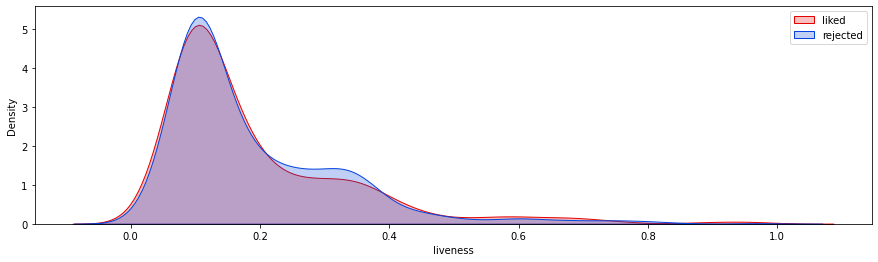

In [ ]:
plt.figure(figsize=(15,4))
sns.kdeplot(df[df['target']==1]['liveness'], shade=True, color=sns.xkcd_rgb["red"], label="Liked")
sns.kdeplot(df[df['target']==0]['liveness'], shade=True, color=sns.xkcd_rgb["blue"], label="Rejected")
plt.legend(('liked','rejected'))

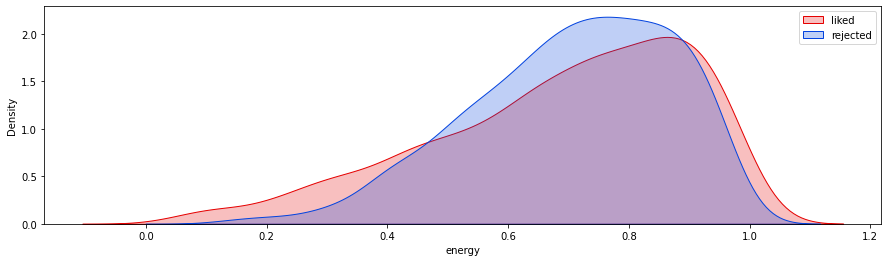

In [ ]:
plt.figure(figsize=(15,4))
sns.kdeplot(df[df['target']==1]['energy'], shade=True, color=sns.xkcd_rgb["red"], label="Liked")
sns.kdeplot(df[df['target']==0]['energy'], shade=True, color=sns.xkcd_rgb["blue"], label="Rejected")
plt.legend(('liked','rejected'))


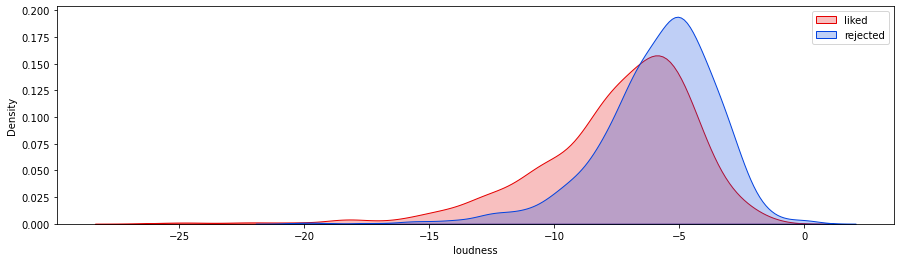

In [ ]:
plt.figure(figsize=(15,4))
sns.kdeplot(df[df['target']==1]['loudness'], shade=True, color=sns.xkcd_rgb["red"], label="Liked")
sns.kdeplot(df[df['target']==0]['loudness'], shade=True, color=sns.xkcd_rgb["blue"], label="Rejected")
plt.legend(('liked','rejected'))

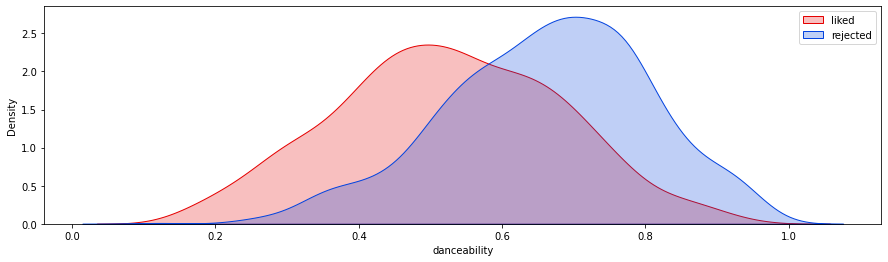

In [ ]:
plt.figure(figsize=(15,4))
sns.kdeplot(df[df['target']==1]['danceability'], shade=True, color=sns.xkcd_rgb["red"], label="Liked")
sns.kdeplot(df[df['target']==0]['danceability'], shade=True, color=sns.xkcd_rgb["blue"], label="Rejected")
plt.legend(('liked','rejected'))

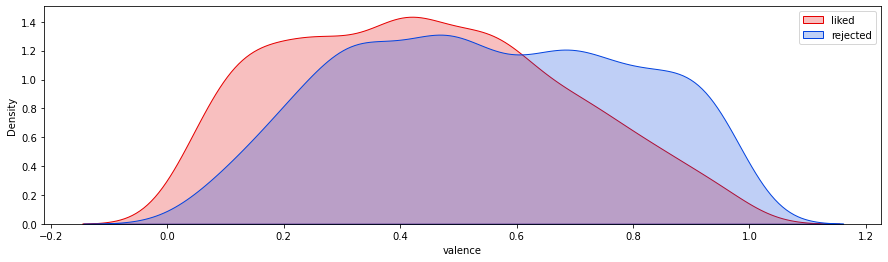

In [ ]:
plt.figure(figsize=(15,4))
sns.kdeplot(df[df['target']==1]['valence'], shade=True, color=sns.xkcd_rgb["red"], label="Liked")
sns.kdeplot(df[df['target']==0]['valence'], shade=True, color=sns.xkcd_rgb["blue"], label="Rejected")
plt.legend(('liked','rejected'))

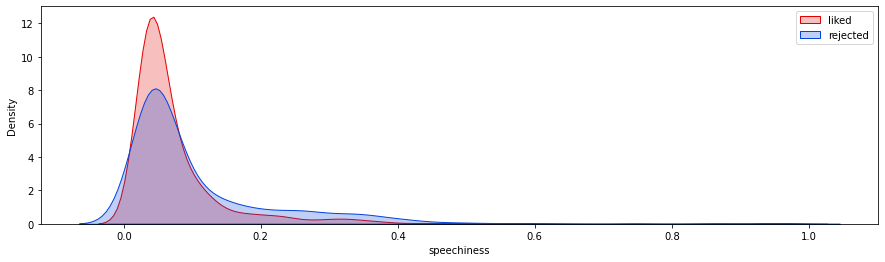

In [ ]:
plt.figure(figsize=(15,4))
sns.kdeplot(df[df['target']==1]['speechiness'], shade=True, color=sns.xkcd_rgb["red"], label="Liked")
sns.kdeplot(df[df['target']==0]['speechiness'], shade=True, color=sns.xkcd_rgb["blue"], label="Rejected")
plt.legend(('liked','rejected'))

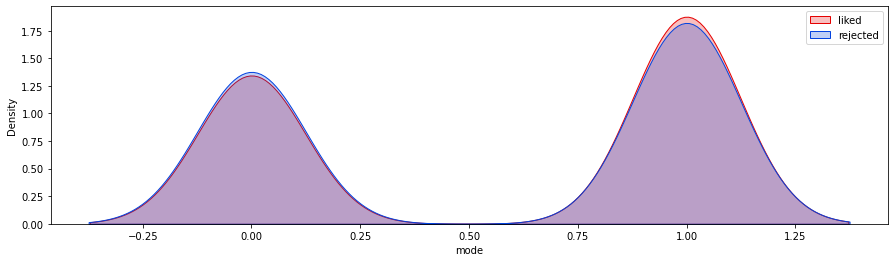

In [ ]:
 plt.figure(figsize=(15,4))
sns.kdeplot(df[df['target']==1]['mode'], shade=True, color=sns.xkcd_rgb["red"], label="Liked")
sns.kdeplot(df[df['target']==0]['mode'], shade=True, color=sns.xkcd_rgb["blue"], label="Rejected")
plt.legend(('liked','rejected'))

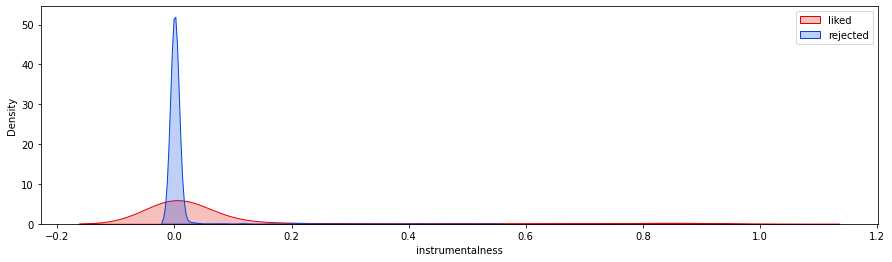

In [ ]:
plt.figure(figsize=(15,4))
sns.kdeplot(df[df['target']==1]['instrumentalness'], shade=True, color=sns.xkcd_rgb["red"], label="Liked")
sns.kdeplot(df[df['target']==0]['instrumentalness'], shade=True, color=sns.xkcd_rgb["blue"], label="Rejected")
plt.legend(('liked','rejected'))

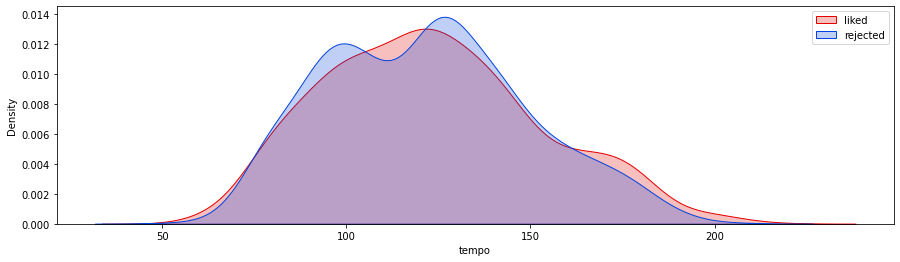

In [ ]:
plt.figure(figsize=(15,4))
sns.kdeplot(df[df['target']==1]['tempo'], shade=True, color=sns.xkcd_rgb["red"], label="Liked")
sns.kdeplot(df[df['target']==0]['tempo'], shade=True, color=sns.xkcd_rgb["blue"], label="Rejected")
plt.legend(('liked','rejected'))

Следно, ќе ги ги разгледаме распределбите на секој од атрибутите на песните кои што се означени како liked.

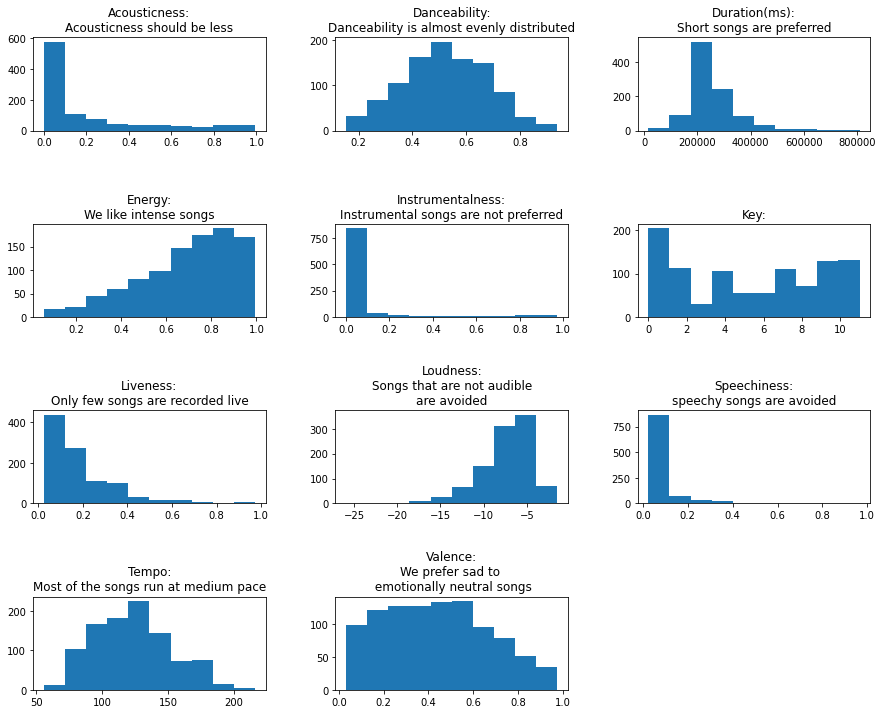

In [ ]:
fig,axes = plt.subplots(4,3,figsize = (15,12))
plt.subplots_adjust(hspace = 1,wspace= 0.3)

#acousticness
axes[0,0].hist(df[df.target == 1].acousticness.values)
axes[0,0].set_title("Acousticness:\nAcousticness should be less")

#danceability
axes[0,1].set_title("Danceability:\nDanceability is almost evenly distributed")
axes[0,1].hist(df[df.target == 1].danceability.values)

#duration_ms
axes[0,2].set_title("Duration(ms):\nShort songs are preferred")
axes[0,2].hist(df[df.target == 1].duration_ms.values)

#energy
axes[1,0].set_title("Energy:\nWe like intense songs")
axes[1,0].hist(df[df.target == 1].energy.values)

#instrumentalness
axes[1,1].set_title("Instrumentalness:\nInstrumental songs are not preferred")
axes[1,1].hist(df[df.target == 1].instrumentalness.values)

#key
axes[1,2].set_title("Key:")
axes[1,2].hist(df[df.target == 1].key.values)

#liveness
axes[2,0].set_title("Liveness:\nOnly few songs are recorded live")
axes[2,0].hist(df[df.target == 1].liveness.values)

#loudness
axes[2,1].set_title("Loudness:\nSongs that are not audible\nare avoided")
axes[2,1].hist(df[df.target == 1].loudness.values)

#speechiness
axes[2,2].set_title("Speechiness:\nspeechy songs are avoided")
axes[2,2].hist(df[df.target == 1].speechiness.values)

#tempo
axes[3,0].set_title("Tempo:\nMost of the songs run at medium pace")
axes[3,0].hist(df[df.target == 1].tempo.values)

#valence
axes[3,1].set_title("Valence:\nWe prefer sad to \n emotionally neutral songs")
axes[3,1].hist(df[df.target == 1].valence.values)

#deleting extra axis
fig.delaxes(axes[3,2])
plt.show()
